In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df_1 = pd.read_csv("C:\\Users\\tjmcp\\Personal Projects\\Datasets\\titanic\\train.csv")
df_2 = pd.read_csv("C:\\Users\\tjmcp\\Personal Projects\\Datasets\\titanic\\test.csv")

# add survival column to the train dataframs then combine train and test dataframes
df_2['Survived'] = 0
df = pd.concat([df_1, df_2], axis = 0 )
df.head()
df = df.drop('Name',axis =1)
df.head()
df = df.drop('Ticket',axis =1)
#df = df.set_index('Id')

<Axes: >

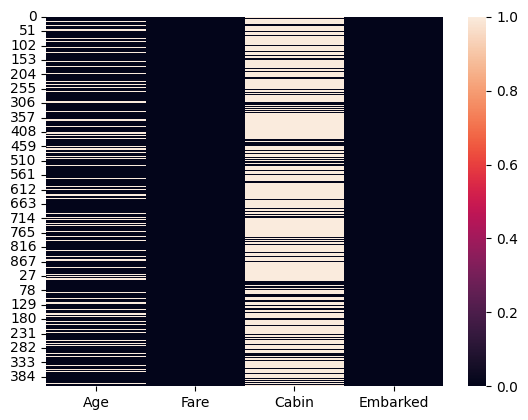

In [29]:
#takes columns with at least 1 null value
df_null = df[df.isnull().sum()[df.isnull().sum() >0].index]
#use heatmap to visualize which values have the most null values
sns.heatmap(df_null.isnull())

In [30]:
#make dataframe with only data of type object
df_objects = df[df.select_dtypes(include=['object']).columns]

#drop columns with too many null values
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()>600].index], axis = 1)
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum()>600].index], axis = 1)

#replace nan with null
df_objects = df_objects.fillna('null')

#encode the objects
df_objects_encoded = pd.get_dummies(df_objects)

df.head()
df_objects_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_null
0,False,True,False,False,True,False
1,True,False,True,False,False,False
2,True,False,False,False,True,False
3,True,False,False,False,True,False
4,False,True,False,False,True,False


In [31]:
# drop all columns containing null and print which were dropped 
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis =1)
        print(i)

Embarked_null


In [32]:
#create new df from old df and encoded objects
new_df = pd.concat([df, df_objects_encoded],axis = 1)

#drop all objects columns since the encoded df has already translated them
new_df = new_df.drop(new_df.select_dtypes(include= ['object']),axis=1)

#print count of all nan values
new_df.isna().sum()[new_df.isna().sum() >0]

Age     263
Fare      1
dtype: int64

In [35]:
new_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [46]:
#fill nan in age column with mean 
new_df['Age'] = new_df['Age'].fillna(np.round(new_df['Age'].mean())) 
#fill nan in far column with mode
new_df['Fare'] = new_df['Fare'].fillna(new_df['Fare'].mode()[0]) 

#check that all nan were filled in 
new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

In [47]:
#split new_df in to test and train using length of df_1
training_data = new_df[0: len(df_1)]
testing_data = new_df[len(df_1):]

#drop survived column 
testing_data = testing_data.drop(columns = 'Survived')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#split training data into X and y
X = training_data.drop(columns= 'Survived')
y = training_data['Survived']

#split data into training and testing sets 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= .2)

#reshape the target variables into target vectors
Y_train = np.reshape(Y_train, (-1,1)) # Reshaping for a single feature target
Y_test = np.reshape(Y_test,(-1,1))


#check shap of x and y train
